In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train,x_test=x_train/255.0,x_test/255.0 #standardizing data: 0-1
x_train.shape,y_train.shape#N x 28 x28


((60000, 28, 28), (60000,))

In [5]:
#model building
model=tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28,28)),#since input is 3D
    tf.keras.layers.Dense(128,activation='relu'),#gives 128 output which are input to new layers
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')#since images of 10 numbers are to be predicted
    
])

In [6]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0408 - accuracy: 0.9865 - val_loss: 0.0715 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0385 - accuracy: 0.9871 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.0741 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0762 - val_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0327 - accuracy: 0.9886 - val_loss: 0.0748 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.0845 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0304 - accuracy: 0.9898 - val_loss: 0.0766 - val_accura

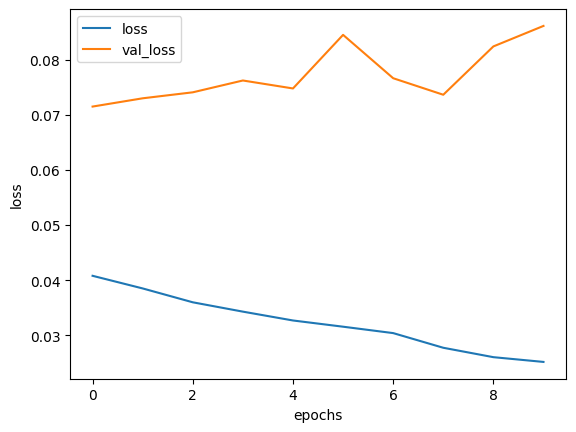

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs") 
plt.legend(loc=0)

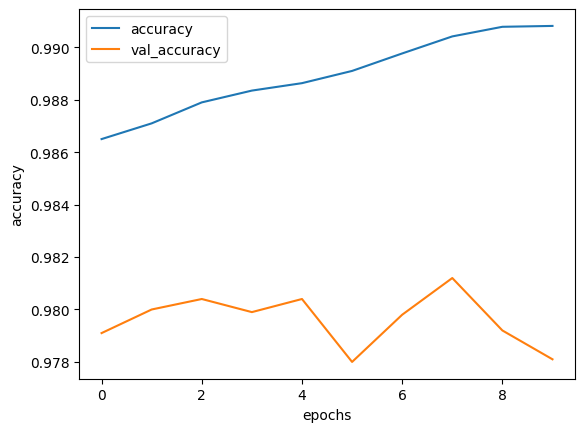

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.ylabel("accuracy")
plt.xlabel("epochs") 
plt.legend(loc=0)

In [16]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9781
[0.0861198827624321, 0.9781000018119812]


313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization
cm


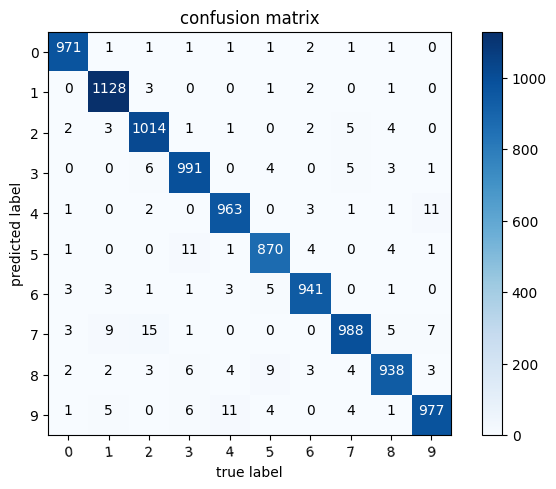

In [29]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))





Text(0.5, 1.0, 'true label: 7 predicted: 2')

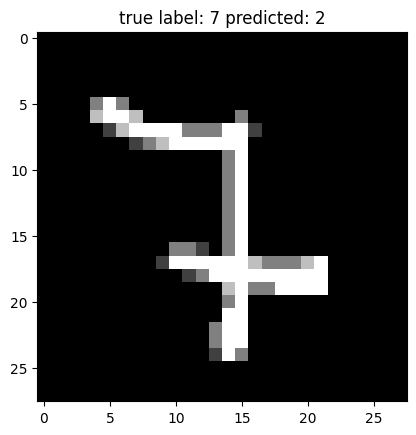

In [38]:
#show some misclassified example
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("true label: %s predicted: %s"%(y_test[i],p_test[i]))

